In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing Training and Testing Datasets
#Storing these datasets into Dataframes 
df_train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
df_train = df_train.iloc[:700000,:]
df_test = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")
df_train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,p,0.67,b,t,n,f,NaN,c,g,...,NaN,NaN,n,NaN,NaN,t,f,NaN,g,a
699996,699996,p,2.65,x,g,n,f,a,NaN,w,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
699997,699997,p,9.25,f,NaN,w,f,x,c,p,...,r,i,w,NaN,NaN,f,f,NaN,d,a
699998,699998,p,1.36,x,g,y,f,d,d,n,...,NaN,s,n,NaN,NaN,f,f,NaN,d,a


In [5]:
#Droping the 'id' and 'class' columns from the training dataframe and
#Concating traing and testing Dataframes and 
#Storing these concated Dataframes into a Dataframe 'all_data'
all_data = pd.concat([df_train.drop(['id','class'], axis=1), df_test])

In [6]:
#Checking datatypes and memory usage info of the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    700000 non-null  int64  
 1   class                 700000 non-null  object 
 2   cap-diameter          700000 non-null  float64
 3   cap-shape             699989 non-null  object 
 4   cap-surface           549430 non-null  object 
 5   cap-color             699997 non-null  object 
 6   does-bruise-or-bleed  699998 non-null  object 
 7   gill-attachment       581844 non-null  object 
 8   gill-spacing          418262 non-null  object 
 9   gill-color            699988 non-null  object 
 10  stem-height           700000 non-null  float64
 11  stem-width            700000 non-null  float64
 12  stem-root             80723 non-null   object 
 13  stem-surface          254970 non-null  object 
 14  stem-color            699993 non-null  object 
 15  

In [7]:
#Creating a function to reduce the memory usage by a given dataframe
def reduce_mem_usage(train_data):
    start_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in train_data.columns:
        col_type = train_data[col].dtype

        if col_type != object:
            c_min = train_data[col].min()
            c_max = train_data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_data[col] = train_data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_data[col] = train_data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_data[col] = train_data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_data[col] = train_data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train_data[col] = train_data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_data[col] = train_data[col].astype(np.float32)
                else:
                    train_data[col] = train_data[col].astype(np.float64)
        else:
            train_data[col] = train_data[col].astype('category')

    end_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train_data

In [8]:
#Reducing the Memory usage by Traning data
df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 117.49 MB
Memory usage after optimization is: 18.71 MB
Decreased by 84.1%


In [9]:
#Reducing the Memory usage by Testing data
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 332.93 MB
Memory usage after optimization is: 53.53 MB
Decreased by 83.9%


In [10]:
#Reducing the Memory usage by Concated data
all_data = reduce_mem_usage(all_data)

Memory usage of dataframe is 466.27 MB
Memory usage after optimization is: 92.75 MB
Decreased by 80.1%


In [11]:
#Understaning the Training Data
df_train.describe()

,id,cap-diameter,stem-height,stem-width
count,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,NaN,NaN,NaN
std,202072.738554,0.000000,0.000000,0.000000
min,0.000000,0.409912,0.000000,0.000000
25%,174999.750000,3.310547,4.671875,4.960938
50%,349999.500000,5.750000,5.878906,9.640625
75%,524999.250000,8.226562,7.410156,15.617188
max,699999.000000,80.687500,88.750000,102.500000


In [12]:
#Droping 'id' column from Training dataframe and 'all_data'
df_train.drop("id", axis=1, inplace=True)
all_data.drop("id", axis=1, inplace=True)

In [13]:
#Creating a new dataframe that contains all the numerical columns of the Training data
df_num = df_train.select_dtypes(include=['number'])
df_num.head()

,cap-diameter,stem-height,stem-width
0,8.796875,4.511719,15.390625
1,4.511719,4.789062,6.480469
2,6.941406,6.851562,9.929688
3,3.880859,4.160156,6.531250
4,5.851562,3.369141,8.359375


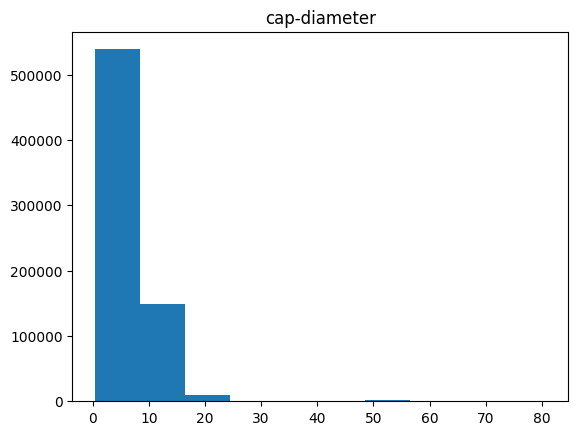

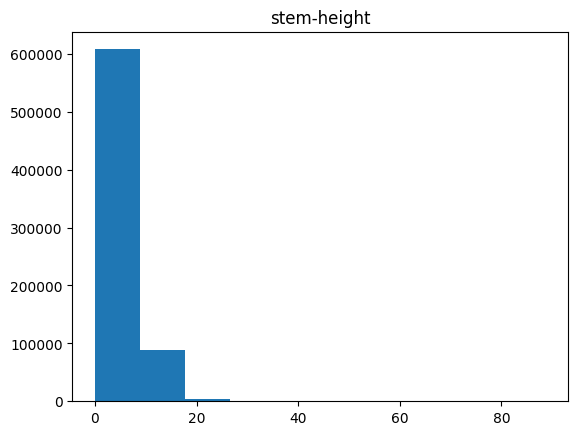

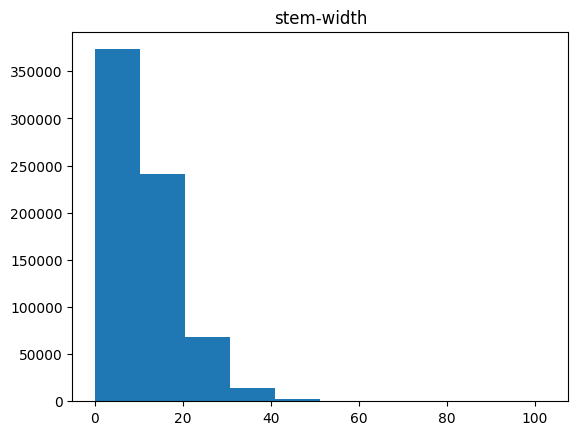

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#Ploting Histograms of the column data of new numerical dataframe to understand the data distribution
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

              cap-diameter  stem-height  stem-width
cap-diameter      1.000000     0.365609    0.746855
stem-height       0.365609     1.000000    0.356300
stem-width        0.746855     0.356300    1.000000


<Axes: >

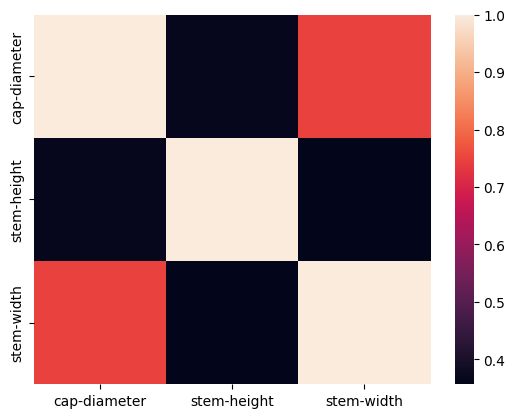

In [15]:
#Ploting the Heatmap of 'df_num' to understand the correlation between different variables
import seaborn as sns
print(df_num.corr())
sns.heatmap(df_num.corr())

In [16]:
#Grouping the data by 'Survived' column
pd.pivot_table(df_train, index='class', values = ['cap-diameter', 'stem-height', 'stem-width'])

,cap-diameter,stem-height,stem-width
class,,,
e,7.125203,6.495491,12.643143
p,5.618560,6.225668,9.895107


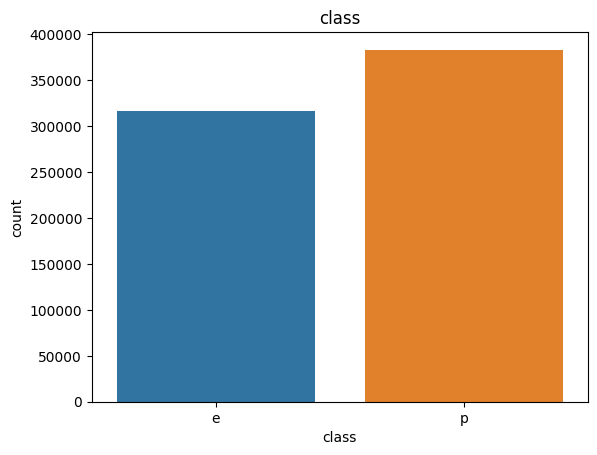

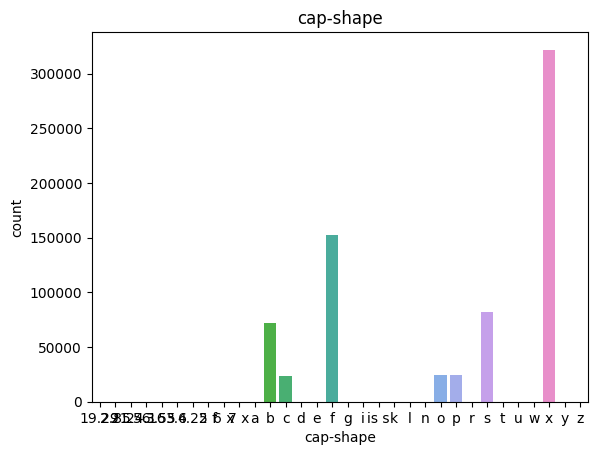

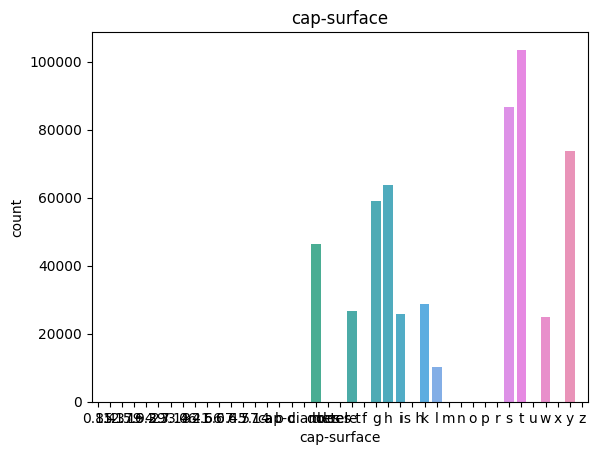

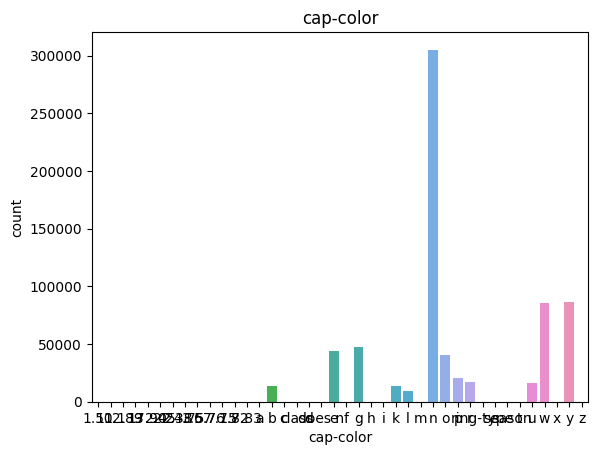

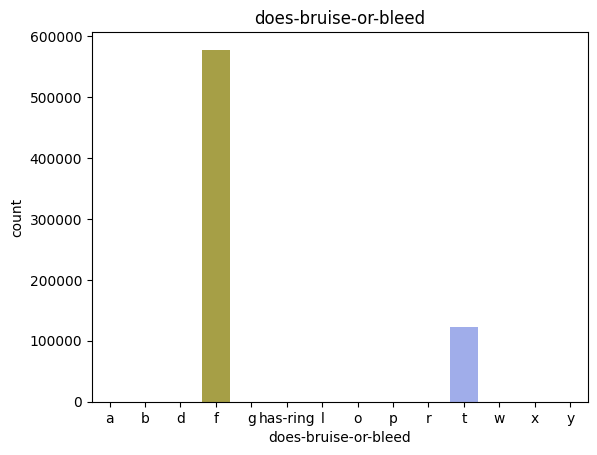

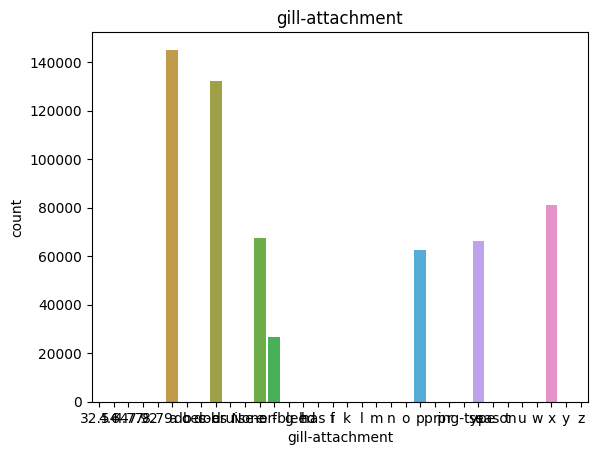

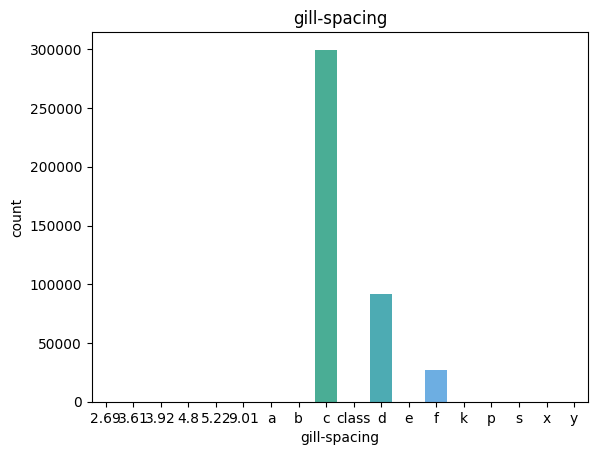

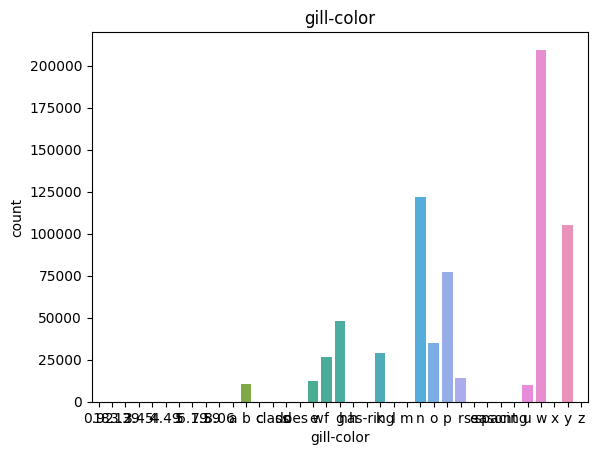

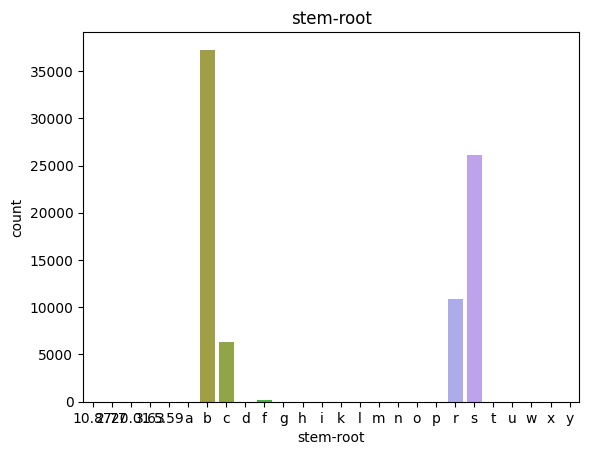

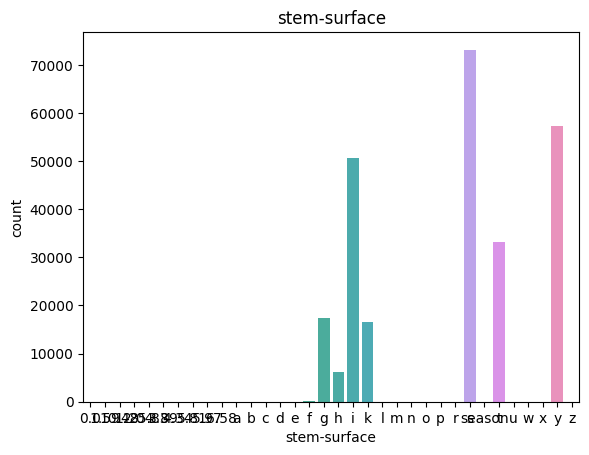

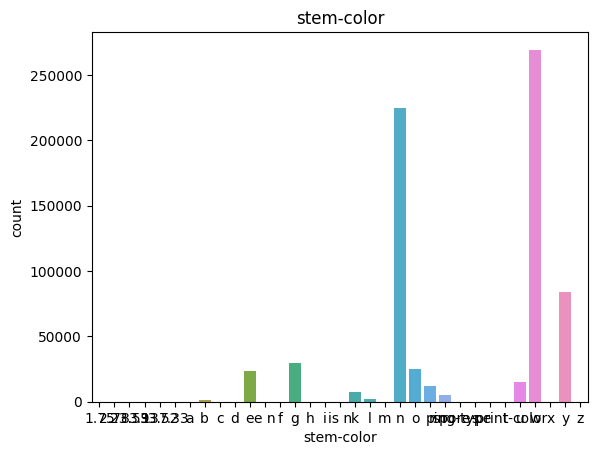

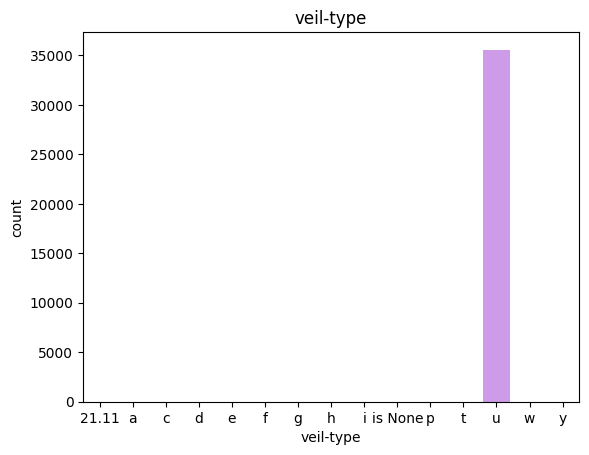

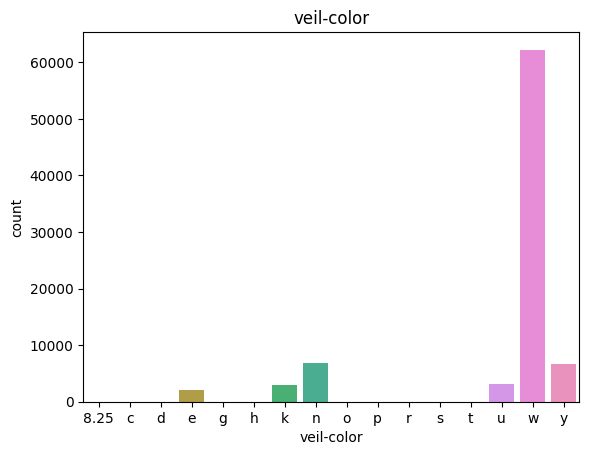

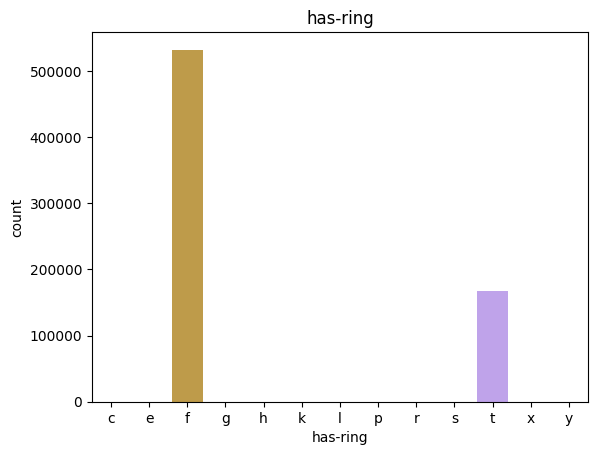

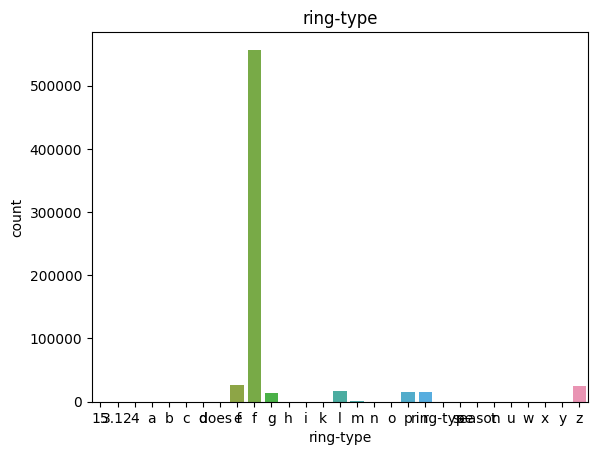

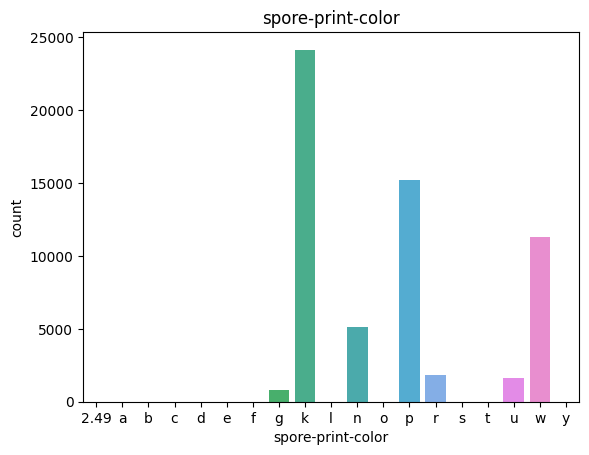

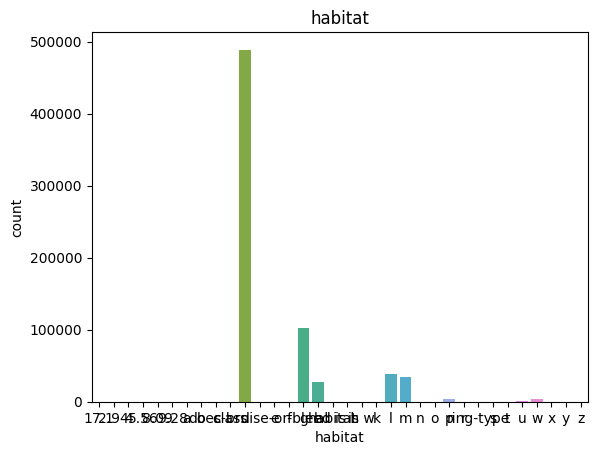

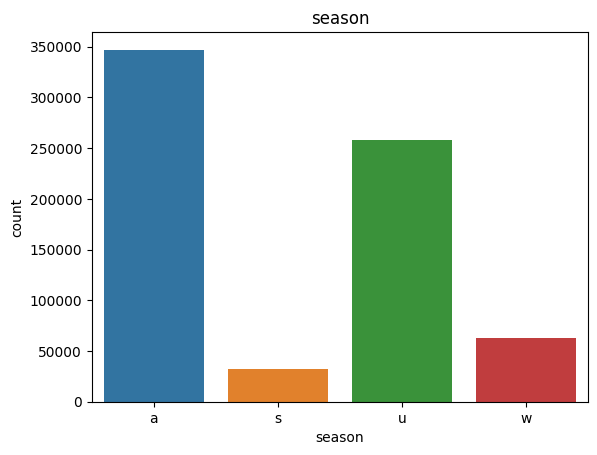

In [17]:
#Creating a new dataframe that contains all the categorical columns of the Training data
df_cat = df_train.select_dtypes(include=['category'])

#Ploting all the categorical columns as bar charts
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.show()

In [18]:
#Droping the 'veil-type' column as it contains a single (constant) value
all_data.drop("veil-type", axis=1, inplace=True)

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2777964 entries, 0 to 2077963
Data columns (total 19 columns):
 #   Column                Dtype   
---  ------                -----   
 0   cap-diameter          float16 
 1   cap-shape             category
 2   cap-surface           category
 3   cap-color             category
 4   does-bruise-or-bleed  category
 5   gill-attachment       category
 6   gill-spacing          category
 7   gill-color            category
 8   stem-height           float16 
 9   stem-width            float16 
 10  stem-root             category
 11  stem-surface          category
 12  stem-color            category
 13  veil-color            category
 14  has-ring              category
 15  ring-type             category
 16  spore-print-color     category
 17  habitat               category
 18  season                category
dtypes: category(16), float16(3)
memory usage: 79.5 MB


In [20]:
#print(all_data['cap-shape'].value_counts())

In [21]:
#value_counts = all_data['cap-shape'].value_counts()
#all_data = all_data[~all_data['cap-shape'].isin(value_counts[value_counts <= 10].index)]

In [22]:
#Replacing all the null values of the numerical columns of 'all_data' with Mode of the respective column
for col in all_data.select_dtypes(include=['number']).columns:
    print(all_data[col].isnull().value_counts())
    all_data[col].fillna(all_data[col].mode().values[0], inplace=True)
    print(all_data[col].isnull().value_counts())

cap-diameter
False    2777957
True           7
Name: count, dtype: int64
cap-diameter
False    2777964
Name: count, dtype: int64
stem-height
False    2777963
True           1
Name: count, dtype: int64
stem-height
False    2777964
Name: count, dtype: int64
stem-width
False    2777964
Name: count, dtype: int64
stem-width
False    2777964
Name: count, dtype: int64


In [23]:
#Replacing all the null values of the categorical columns of 'all_data' with Mode of the respective column
for col in all_data.select_dtypes(include=['category']).columns:
    print(all_data[col].isnull().value_counts())
    all_data[col].fillna(all_data[col].mode().values[0], inplace=True)
    print(all_data[col].isnull().value_counts())

cap-shape
False    2777922
True          42
Name: count, dtype: int64
cap-shape
False    2777964
Name: count, dtype: int64
cap-surface
False    2180490
True      597474
Name: count, dtype: int64
cap-surface
False    2777964
Name: count, dtype: int64
cap-color
False    2777948
True          16
Name: count, dtype: int64
cap-color
False    2777964
Name: count, dtype: int64
does-bruise-or-bleed
False    2777952
True          12
Name: count, dtype: int64
does-bruise-or-bleed
False    2777964
Name: count, dtype: int64
gill-attachment
False    2309987
True      467977
Name: count, dtype: int64
gill-attachment
False    2777964
Name: count, dtype: int64
gill-spacing
False    1656631
True     1121333
Name: count, dtype: int64
gill-spacing
False    2777964
Name: count, dtype: int64
gill-color
False    2777903
True          61
Name: count, dtype: int64
gill-color
False    2777964
Name: count, dtype: int64
stem-root
True     2457289
False     320675
Name: count, dtype: int64
stem-root
False    2777

In [24]:
#Create a new dataframe that stores the updated numerial and categorical columns of 'all_data'
all_updated = pd.concat([all_data.select_dtypes(include=['number']),pd.get_dummies(all_data.select_dtypes(include=['category']))], axis=1)

#Droping the columns with more than 99% False values
threshold=0.99
false_percentage = (all_updated == False).mean()
all_updated.drop(false_percentage[false_percentage >= threshold].index, axis=1, inplace=True)
all_updated.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,spore-print-color_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,8.796875,4.511719,15.390625,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,4.511719,4.789062,6.480469,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
2,6.941406,6.851562,9.929688,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,3.880859,4.160156,6.531250,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,5.851562,3.369141,8.359375,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False


In [25]:
#Normalizing the data of 'all_updated' using StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_transformed = scale.fit_transform(all_updated)
all_transformed = pd.DataFrame(all_transformed, index=all_updated.index, columns=all_updated.columns)

In [26]:
#Splitting the all_transformed dataframe back to the Training and Testing dataframes
X_train = all_transformed.iloc[:len(df_train), :]
X_test = all_transformed.iloc[len(X_train):, :]
Y_train = df_train['class']

In [27]:
#Observing the first 5 rows of the X_train
X_train.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,spore-print-color_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,0.533203,-0.679688,0.524414,-0.337402,-0.186157,1.895508,-0.189575,-0.188477,-0.36377,-0.924316,...,-0.128296,0.657715,-0.414062,-0.200073,-0.241577,-0.226196,1.008789,-0.218506,-0.765625,-0.313477
1,-0.383545,-0.577148,-0.576172,-0.337402,-0.186157,-0.527344,-0.189575,-0.188477,-0.36377,1.081055,...,-0.128296,0.657715,-0.414062,-0.200073,-0.241577,-0.226196,-0.990723,-0.218506,-0.765625,3.191406
2,0.136230,0.187012,-0.150146,-0.337402,-0.186157,1.895508,-0.189575,-0.188477,-0.36377,-0.924316,...,-0.128296,-1.520508,-0.414062,-0.200073,4.140625,-0.226196,-0.990723,-0.218506,-0.765625,3.191406
3,-0.518555,-0.810059,-0.569824,-0.337402,-0.186157,1.895508,-0.189575,-0.188477,-0.36377,-0.924316,...,-0.128296,0.657715,-0.414062,-0.200073,-0.241577,-0.226196,-0.990723,-0.218506,1.305664,-0.313477
4,-0.096924,-1.103516,-0.344238,-0.337402,-0.186157,-0.527344,-0.189575,-0.188477,-0.36377,1.081055,...,-0.128296,-1.520508,2.414062,-0.200073,-0.241577,-0.226196,1.008789,-0.218506,-0.765625,-0.313477


In [28]:
#Importing some useful functions from scikit-learn library
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [29]:
#Training and Checking Accuracy Score of Losgistic Regression Model on Training Data 
#using Cross Validation
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, Y_train, cv=5)
print(cv)
print(cv.mean())

[0.83320714 0.834      0.83397857 0.83346429 0.83327857]
0.8335857142857144


In [30]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [ ]:
#Training Random Forest Model on Training Data using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf_model = grid_search.fit(X_train, Y_train)
rf_model.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
#Predicting the Outcome for X_test Dataset and Exporting the Dataframe to .csv
Y_hat = rf_model.predict(X_test)
submission = {'id': df_test.id, 'class': Y_hat}
submission = pd.DataFrame(data=submission)
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
#The final test outcome has achieved an accuracy score of 0.9825 on this Kaggle's competition